In [1]:
# Name: Ranveer Singh
# Class and Section: CS 4372.001
# Net ID: rxs174730
# Homework 3

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import os, pathlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl 

In [3]:
np.random.seed(0)

In [4]:
# Getting the data from the cloud storage. The data would be stored locally in ~/.keras/datasets
data_dir = tf.keras.utils.get_file(fname="AIDER.zip", origin="https://pythonbasicsfordatascienceproject-donotdelete-pr-puyulalns4wabr.s3.us.cloud-object-storage.appdomain.cloud/AIDER.zip", extract=True)
data_dir = data_dir[:-4]

147439616/147433690 [==============================] - 56s 0us/step


In [5]:
# The training, testing and validation datasets are already in their folder. Therefore, we are getting the datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(os.path.join(data_dir, "train"), label_mode="categorical")
test_ds = tf.keras.preprocessing.image_dataset_from_directory(os.path.join(data_dir, "test"), label_mode="categorical")
val_ds = tf.keras.preprocessing.image_dataset_from_directory(os.path.join(data_dir, "validation"), label_mode="categorical")

Found 2122 files belonging to 5 classes.
Found 276 files belonging to 5 classes.
Found 276 files belonging to 5 classes.


In [6]:
# For the Tensorflow model, we will first have a layer to resize and rescale the dataset
resize_and_rescale = Sequential([
    layers.experimental.preprocessing.Resizing(224, 224),
    layers.experimental.preprocessing.Rescaling(1.0/255),
    ])

In [7]:
# The next layers we would be creating are for the data augmentation where we would be performing the following steps
# 1) Performing a random horizontal or vertical flip
# 2) Performing a random rotation 
# 3) Performing a random contrast
# 4) Performing a random zoom
data_augmentation = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomContrast(0.2),
  layers.experimental.preprocessing.RandomZoom(height_factor=0.4, width_factor=0.4)
])

In [8]:
# Getting the base model on which we would be training our dataset
base_model = tf.keras.applications.MobileNetV2(weights="imagenet")
for layer in base_model.layers:
    layer.trainable = False

# Set the last 4 layers to be trainable
for i in range(1,5):
    base_model.layers[-i].trainable = True

In [9]:
# We would now be creating our model using a pretrained model that is present in keras
# We could have used a model in tf_hub, however, we can't set the individual layers in the model 

# For the model, we would first have our resize and reshape layer to standardize the dataset
# Next, we would have our data augmentation layer to augment the data
# Then, we would have our base pretrained model
# Finally, we would have a connected classification model to classify our data into the given number of classes
model = tf.keras.Sequential()
model.add(resize_and_rescale)
model.add(data_augmentation)
model.add(base_model)
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(5, activation="softmax"))

In [10]:
# Compiling the model for the dataset
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005, beta_1=0.9), loss=tf.keras.losses.categorical_crossentropy, metrics=tf.keras.metrics.categorical_accuracy)

In [11]:
# We want to define callbacks for using the tensorboard which would be useful for visualizing the training as well as validation error with respect to the number of epochs
log_dir = os.path.join(os.getcwd(), 'logs')
callbacks = [tf.keras.callbacks.TensorBoard(log_dir=log_dir), tf.keras.callbacks.ModelCheckpoint('aider_classification.h5', verbose=1, save_best_only=True)]

In [12]:
# Training the model on the data and getting the history object in return
history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=callbacks)

Epoch 1/10
 1/67 [..............................] - ETA: 0s - loss: 1.6088 - categorical_accuracy: 0.2188WARNING:tensorflow:From /home/ranveersingh/.local/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
67/67 [==============================] - ETA: 0s - loss: 1.3755 - categorical_accuracy: 0.5254
Epoch 00001: val_loss improved from inf to 1.08862, saving model to aider_classification.h5
67/67 [==============================] - 55s 824ms/step - loss: 1.3755 - categorical_accuracy: 0.5254 - val_loss: 1.0886 - val_categorical_accuracy: 0.7428
Epoch 2/10
67/67 [==============================] - ETA: 0s - loss: 0.8414 - categorical_accuracy: 0.7945
Epoch 00002: val_loss improved from 1.08862 to 0.94168, saving model to aider_classification.h5
67/67 [==============================] - 54s 803ms/step -

In [13]:
# Summarizing the model trained
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 1000)              3538984   
_________________________________________________________________
dense (Dense)                (None, 10)                10010     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
Total params: 3,549,049
Trainable params: 1,293,625
Non-trainable params: 2,255,424
_________________________________________________________________


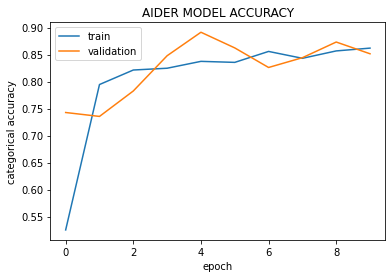

In [14]:
# Generating the history plot for the device
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('AIDER MODEL ACCURACY')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

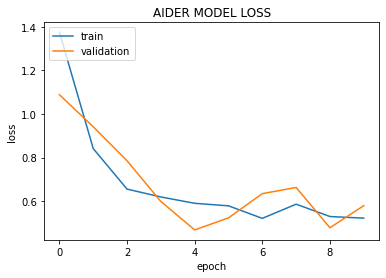

In [15]:
# Plotting the history for the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('AIDER MODEL LOSS')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
# Evaluating the model on the test dataset
model.evaluate(test_ds, return_dict=True)

9/9 [==============================] - 4s 498ms/step - loss: 0.7122 - categorical_accuracy: 0.8188


{'loss': 0.7122395634651184, 'categorical_accuracy': 0.8188405632972717}

In [17]:
mpl.rcParams["figure.figsize"] = (30, 20)
class_labels = train_ds.class_names

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<Figure size 2160x1440 with 0 Axes>

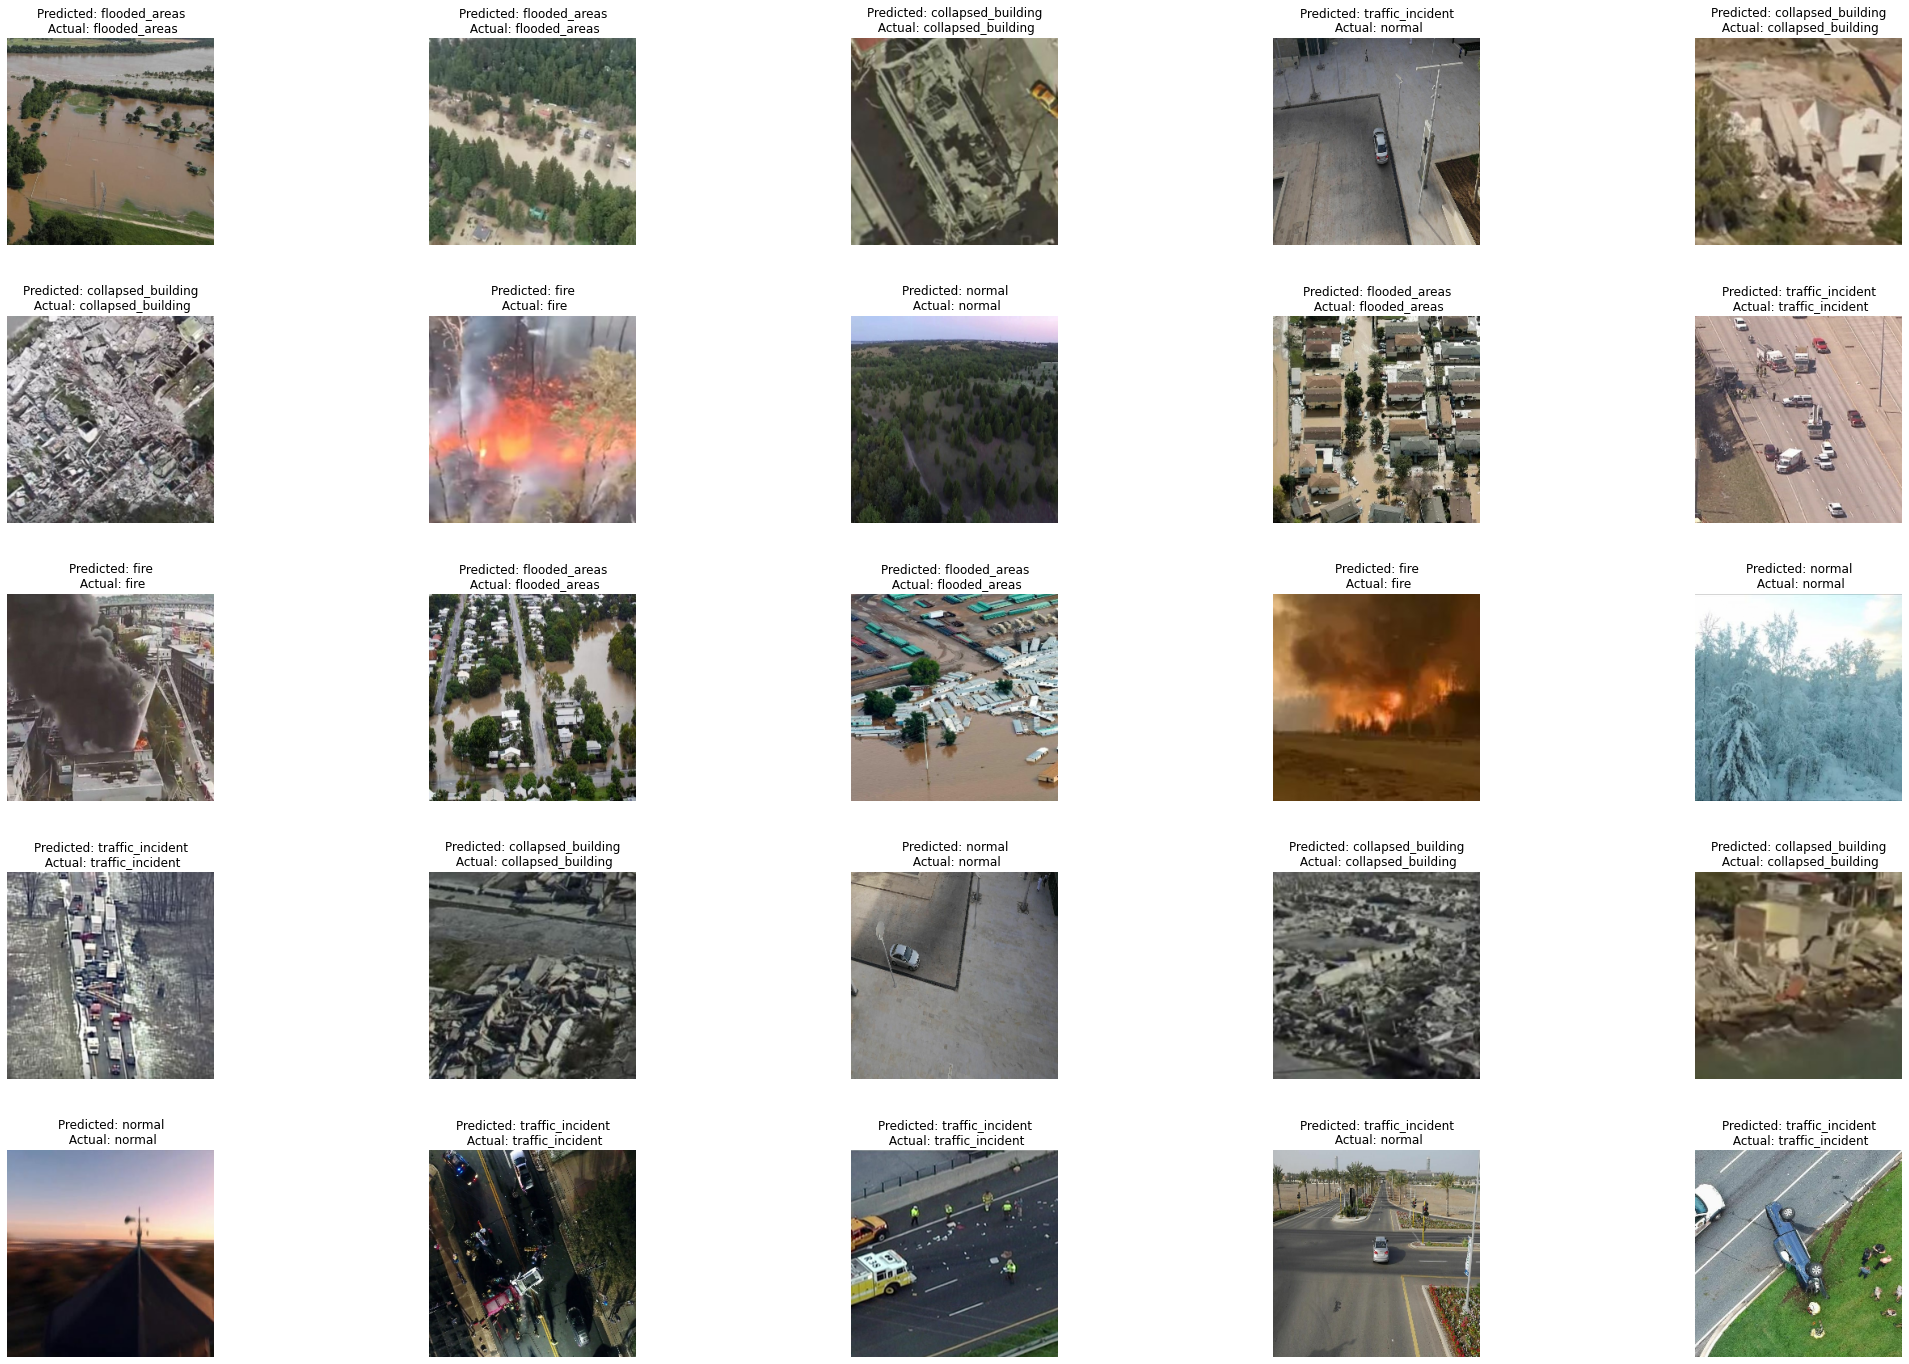

In [18]:
# Now, we want to visualize the first batch of the test dataset and plot those images
plt.figure()
f, ax = plt.subplots(5, 5)
f.tight_layout(pad=5)
for batch_data, batch_labels in test_ds:
    batch_labels = batch_labels.numpy()
    pred_labels = model.predict_classes(batch_data)
    pred_labels = pred_labels[:25].reshape(5, 5)
    for j in range(5):
        for i in range(5):
            actual_label = np.argmax(batch_labels[5*j+i])
            ax[j][i].imshow(batch_data[5*j+i]/255)
            ax[j][i].set_title(f"Predicted: {class_labels[pred_labels[j][i]]}\n Actual: {class_labels[actual_label]}")
            ax[j][i].axis('off')
    break
plt.show()